# Assignment 4: Analyzing Comparative Advantage

**GLBL 5010: Economics for Global Affairs**

**Group Members:**
* Kevin Chen
* Pranav Pattatathunaduvil
* Lucy Kim

---

# Data Cleaning and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Botswana data
bwa_df = pd.read_csv('hwk4a_tradedataBWA.csv', sep='\t')

# Preview the data
bwa_df.head()

,iso,hs2,description,year,x,x_wd
0,BWA,1,Animals; live,2000,235090,9799775232
1,BWA,1,Animals; live,2023,45727526,29942562816
2,BWA,2,Meat and edible meat offal,2000,51610108,42352873472
3,BWA,2,Meat and edible meat offal,2023,23733917,178474467328
4,BWA,3,"Fish and crustaceans, molluscs and other aquat...",2000,1534,42123816960


# 1a. Create a table that reports the total exports in 2000 and 2023, and export growth by sector.

In [2]:
# Calculate yearly totals
bwa_totals = bwa_df.groupby('year').agg({'x': 'sum', 'x_wd': 'sum'}).rename(columns={'x': 'Total_BWA_X', 'x_wd': 'Total_World_X'})

# Pivot data to compare 2000 vs 2023
bwa_pivot = bwa_df.pivot(index=['hs2', 'description'], columns='year', values='x').reset_index()
bwa_pivot['Growth_Rate'] = (bwa_pivot[2023] - bwa_pivot[2000]) / bwa_pivot[2000]

# Display Total Exports
print(f"Total Botswana Exports in 2000: ${bwa_totals.loc[2000, 'Total_BWA_X']:,.0f}")
print(f"Total Botswana Exports in 2023: ${bwa_totals.loc[2023, 'Total_BWA_X']:,.0f}")

# Display growth table (first 10 sectors)
bwa_pivot[['hs2', 'description', 2000, 2023, 'Growth_Rate']].head(10)

Total Botswana Exports in 2000: $2,771,865,783
Total Botswana Exports in 2023: $5,500,564,093


year,hs2,description,2000,2023,Growth_Rate
0,1,Animals; live,235090,45727526,193.510724
1,2,Meat and edible meat offal,51610108,23733917,-0.540130
2,3,"Fish and crustaceans, molluscs and other aquat...",1534,2381250,1551.314211
3,4,Dairy produce; birds' eggs; natural honey; edi...,77585,182639,1.354050
4,5,Animal originated products; not elsewhere spec...,2707,15564,4.749538
5,6,"Trees and other plants, live; bulbs, roots and...",1058,161857,151.983932
6,7,Vegetables and certain roots and tubers; edible,137067,4618147,32.692625
7,8,"Fruit and nuts, edible; peel of citrus fruit o...",39645,27549,-0.305108
8,9,"Coffee, tea, mate and spices",179957,21335,-0.881444
9,10,Cereals,1215967,839478,-0.309621


# 1b. In 2000, produce a histogram of BWA’s revealed comparative advantage across sectors. In how many sectors did BWA have an RCA>=1?

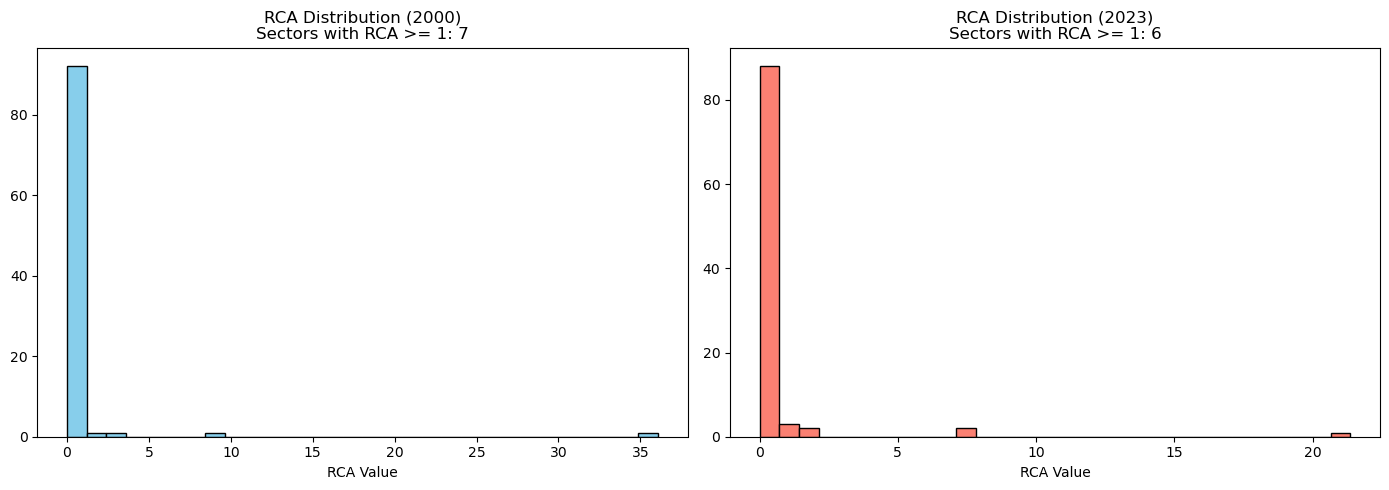

In [3]:
# Merge totals back to main dataframe
bwa_df = bwa_df.merge(bwa_totals, on='year')

# Calculate RCA
bwa_df['rca'] = (bwa_df['x'] / bwa_df['Total_BWA_X']) / (bwa_df['x_wd'] / bwa_df['Total_World_X'])

# Extract years for analysis
rca_2000 = bwa_df[bwa_df['year'] == 2000]
rca_2023 = bwa_df[bwa_df['year'] == 2023]

# Counts of RCA >= 1
count_00 = (rca_2000['rca'] >= 1).sum()
count_23 = (rca_2023['rca'] >= 1).sum()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(rca_2000['rca'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title(f'RCA Distribution (2000)\nSectors with RCA >= 1: {count_00}')
axes[0].set_xlabel('RCA Value')

axes[1].hist(rca_2023['rca'], bins=30, color='salmon', edgecolor='black')
axes[1].set_title(f'RCA Distribution (2023)\nSectors with RCA >= 1: {count_23}')
axes[1].set_xlabel('RCA Value')

plt.tight_layout()
plt.show()

# 1c. Repeat (b) for 2023.

see above

# 1d. What happened to BWA’s comparative advantage in HS71, the two-digit chapter that contains diamond exports?

In [4]:
hs71 = bwa_df[bwa_df['hs2'] == 71][['year', 'rca']]
print("RCA for Diamonds (HS71):")
print(hs71)

RCA for Diamonds (HS71):
     year        rca
140  2000  36.072840
141  2023  21.371299


HS71 contains "Natural, cultured pearls; precious, semi-precious stones...".

In 2000, Botswana's RCA in HS71 was 36.07. By 2023, it dropped to 21.37. While still indicating a massive comparative advantage, the intensity has significantly decreased over the 23-year period.

# 1e. What three sectors has BWA improved its comparative advantage in the most (in absolute terms, not percentage terms)?

In [5]:
# Pivot RCA to calculate difference
rca_diff = bwa_df.pivot(index=['hs2', 'description'], columns='year', values='rca').reset_index()
rca_diff['rca_improvement'] = rca_diff[2023] - rca_diff[2000]

top_3 = rca_diff.sort_values(by='rca_improvement', ascending=False).head(3)
top_3[['hs2', 'description', 'rca_improvement']]

year,hs2,description,rca_improvement
0,1,Animals; live,7.241630
25,26,"Ores, slag and ash",7.184576
76,78,Lead and articles thereof,1.646352


# 1f. Overall, how successful do you think BWA has been in improving its comparative advantage in non-resource products (products other than mining and minerals) over this 23-year period?

Overall, Botswana has had limited success in improving its comparative advantage in non-resource products.

    The number of sectors with RCA≥1 actually decreased from 7 to 6.

    The top "improved" sectors include HS01 (Live Animals) and HS26 (Ores), which are primary/resource-based sectors.

    Although the dominance of diamonds (HS71) has decreased, the country has not yet developed strong comparative advantages in manufacturing or high-tech sectors over this 23-year period.

---------------------

# 2a. Construct the RCA for South African exports to the USA.

In [ ]:
zaf = pd.read_csv('hwk4b_tradedataZAF.csv', sep='\t')

# Sum up world exports to USA for each HS2 (ZAF + RoW)
world_hs2 = zaf.groupby('hs2')['xusa'].sum().reset_index().rename(columns={'xusa': 'world_xusa'})
zaf = zaf.merge(world_hs2, on='hs2')

# Get global totals for the RCA denominator
total_zaf_usa = zaf[zaf['iso']=='ZAF']['xusa'].sum()
total_world_usa = world_hs2['world_xusa'].sum()

# Calculate RCA for South Africa
zaf_rca = zaf[zaf['iso']=='ZAF'].copy()
zaf_rca['rca'] = (zaf_rca['xusa'] / total_zaf_usa) / (zaf_rca['world_xusa'] / total_world_usa)

# Print top 15 RCA sectors clearly
print("Top 15 South African Sectors by RCA (Exports to USA):")
print("-" * 100)
# Selecting relevant columns and sorting
showcase_table = zaf_rca[['hs2', 'description', 'rca']].sort_values(by='rca', ascending=False)
print(showcase_table.head(15).to_string(index=False))

Top 15 South African Sectors by RCA (Exports to USA):
----------------------------------------------------------------------------------------------------
 hs2                                                                                                                                                     description       rca
  26                                                                                                                                              ORES, SLAG AND ASH 46.575214
  71 NATURAL OR CULTURED PEARLS, PRECIOUS OR SEMI-PRECIOUS STONES, PRECIOUS METALS, METALS CLAD WITH PRECIOUS METAL, AND ARTICLES THEREOF; IMITATION JEWELLERY; COIN 13.747439
  75                                                                                                                                     NICKEL AND ARTICLES THEREOF 12.753025
  76                                                                                                                                  ALUMINIUM A

# 2b. What are the top 5 RCA sectors for South Africa?

In [7]:
top_5_zaf = zaf_only.sort_values(by='rca', ascending=False).head(5)
top_5_zaf[['hs2', 'description', 'rca']]

,hs2,description,rca
42,26,"ORES, SLAG AND ASH",46.575214
123,71,"NATURAL OR CULTURED PEARLS, PRECIOUS OR SEMI-P...",13.747439
131,75,NICKEL AND ARTICLES THEREOF,12.753025
132,76,ALUMINIUM AND ARTICLES THEREOF,7.872935
71,41,RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND ...,7.479771


# 2c. Create a scatterplot of South Africa’s RCAs on the x-axis against the tariff change in the y-axis. Add a best fit line to your plot. What does the scatterplot tell you about the correlation between South Africa’s RCA and the tariffs it now faces on its exports to the US?

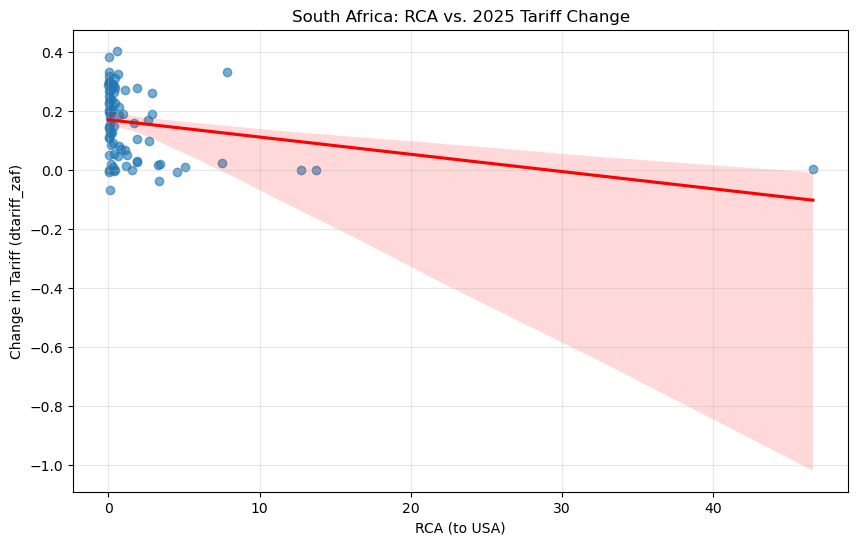

In [8]:
plt.figure(figsize=(10, 6))
sns.regplot(data=zaf_only, x='rca', y='dtariff_zaf', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('South Africa: RCA vs. 2025 Tariff Change')
plt.xlabel('RCA (to USA)')
plt.ylabel('Change in Tariff (dtariff_zaf)')
plt.grid(True, alpha=0.3)
plt.show()

# 2d. Based on your answer in (c), do you think the new tariffs will lead to more or less concentration in South Africa’s exports to the USA?

The new tariffs will likely lead to more concentration in South Africa's exports to the USA. Because sectors where South Africa is already strongest (high RCA) are facing lower relative tariff increases compared to many low-RCA sectors, the "cost" of exporting in diversified, weaker sectors has risen more sharply. This incentivizes the economy to lean further into its existing comparative advantages (primarily minerals and ores) where the tariff burden is lighter, potentially stifling the growth of new export industries.